In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
sns.set(rc={'figure.figsize':(15,12)})



In [2]:
## function used for neral net metric auc 
def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)
    

In [3]:
train=pd.read_csv('data/Santander_Customer_Transaction_Prediction/train.csv')
test=pd.read_csv('data/Santander_Customer_Transaction_Prediction/test.csv')
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


### the neural net part 

In [ ]:
'''full=pd.concat([train,test])
full.head()'''

In [ ]:
'''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for c in full.columns[2:]:
    full[c]=scaler.fit_transform(full[[c]].values.astype(float))
'''


In [ ]:
'''train=full[:200000]
test=full[200000:]
test.head()'''

In [ ]:
''''from keras import layers,models,callbacks
from keras.utils import to_categorical

model=models.Sequential()
model.add(layers.Dense(256,activation='relu',input_shape=(train.shape[1]-2,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
''''

In [ ]:
'''model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy',auroc])'''

In [ ]:
'''x_train=train.drop(columns=['ID_code','target']).values
y_train=train['target'].values
x_val=x_train[:40000]
x_train=x_train[40000:]
y_val=y_train[:40000]
y_train=y_train[40000:]
'''

In [10]:
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier


In [57]:
## this is giving correct LB score 

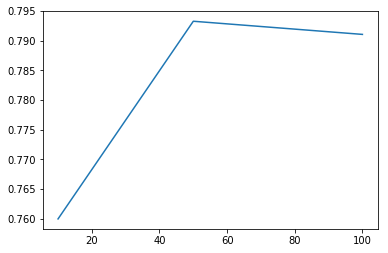

In [34]:
plt.plot(params[:-1],score)

In [59]:
%%time
(x_tr,y_tr)=(train.drop(['target','ID_code'],axis=1).values, train['target'].values)#evaluate with roc_auc_truncated
def _score_func(estimator, X, y):
    pred_probs = estimator.predict_proba(X)[:, 1]
    return roc_auc_truncated(y, pred_probs)

xg_gbm = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', silent=True, nthread=1)

#when in doubt, use xgboost
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.01,0.1,0.3,0.5], #so called `eta` value
              'max_depth': [8],
              'min_child_weight': [3,11],
              'silent': [1],
              'subsample': [0.9],
              'colsample_bytree': [0.5],
              'n_estimators': [10,20,50,100], #number of trees
              'seed': [1337]}
#should evaluate by train_eval instead of the full dataset
skf=StratifiedKFold(n_splits=3,shuffle=True,random_state=123)
clf = GridSearchCV(xg_gbm, parameters, n_jobs=4, 
                   cv=skf.split(x_tr, y_tr), 
                   verbose=2, refit=True,scoring='roc_auc')
clf.fit(train.drop(['target','ID_code'],axis=1).values, train['target'])




Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 45.5min
[Parallel(n_jobs=4)]: Done  96 out of  96 | elapsed: 142.7min finished


CPU times: user 11min 18s, sys: 1.36 s, total: 11min 19s
Wall time: 2h 25min 33s


In [60]:
#best_parameters, score, _ = max(clf.cv_results_, key=lambda x: x[1])
print('Raw AUC score:', clf.best_score_)
print('Best parameters:', clf.best_params_)


Raw AUC score: 0.8598904680366619
Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 11, 'n_estimators': 100, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.9}


In [61]:
xg_gbm = xgb.XGBClassifier(colsample_bytree= 0.5, learning_rate= 0.1, max_depth= 8, min_child_weight= 11, n_estimators= 100, nthread= 4, objective= 'binary:logistic', seed= 1337, silent= 1, subsample= 0.9)
xg_gbm.fit(train.drop(['target','ID_code'],axis=1).values, train['target'])


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=11, missing=None, n_estimators=100,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1337, silent=1,
       subsample=0.9)

In [62]:
res_df=test[['ID_code']].copy()
res_df['target']=xg_gbm.predict_proba(test.drop(['ID_code'],axis=1).values)[:,1]
res_df.head()

,ID_code,target
0,test_0,0.074684
1,test_1,0.254170
2,test_2,0.257913
3,test_3,0.124369
4,test_4,0.042396


In [63]:
res_df.target= np.clip(res_df.target, 0, 1)

In [64]:
res_df.to_csv('submission.csv',header=True,index=False)

In [65]:
print(res_df.target.max())

0.98922765


Text(0.5, 1.0, 'Feature Importance')

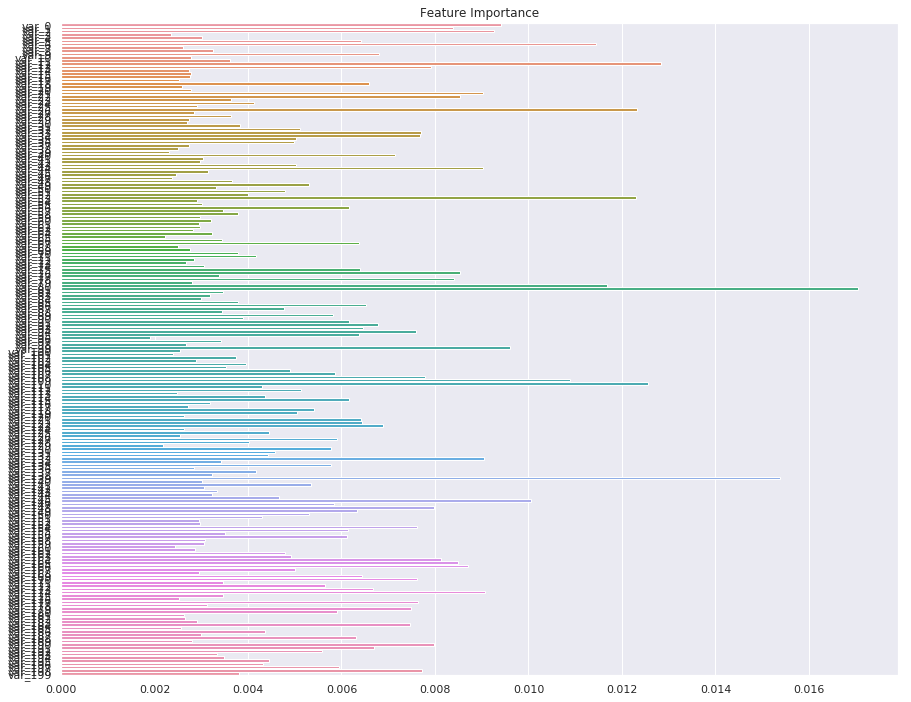

In [84]:
g=sns.barplot(xg_gbm.feature_importances_,train.columns[2:])
plt.title('Feature Importance')


### Light GBM 

In [92]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
#import xgboost as xgb
import pickle
import os
import gc
gc.enable()


In [94]:
def fit_lgb(X_fit, y_fit, X_val, y_val, counter, lgb_path, name):
    
    model = lgb.LGBMClassifier(objective = "binary", 
    boosting = "gbdt",
    metric="auc",
    boost_from_average=False,
    num_threads=8,
    learning_rate =0.0081,
    num_leaves =13,
    max_depth=-1,
    feature_fraction =0.041,
    bagging_freq =5,
    bagging_fraction =0.331,
    min_data_in_leaf =80,
    min_sum_hessian_in_leaf =10.0,
    verbosity =1,
    num_iterations =99999999,
    seed=44000)
    
     
    model.fit(X_fit, y_fit, 
              eval_set=[(X_val, y_val)],
              verbose=3500, 
              early_stopping_rounds=3500)
                  
    cv_val = model.predict_proba(X_val)[:,1]
    
    #Save LightGBM Model
    save_to = '{}{}_fold{}.txt'.format(lgb_path, name, counter+1)
    model.booster_.save_model(save_to)
    
    return cv_val
   

In [100]:
 def train_stage(df_path, lgb_path):
    
    print('Load Train Data.')
    df = pd.read_csv(df_path)
    print('\nShape of Train Data: {}'.format(df.shape))
    
    y_df = np.array(df['target'])                        
    df_ids = np.array(df.index)                     
    df.drop(['ID_code', 'target'], axis=1, inplace=True)
    
    lgb_cv_result = np.zeros(df.shape[0])
    
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    skf.get_n_splits(df_ids, y_df)
    
    print('\nModel Fitting...')
    for counter, ids in enumerate(skf.split(df_ids, y_df)):
        print('\nFold {}'.format(counter+1))
        X_fit, y_fit = df.values[ids[0]], y_df[ids[0]]
        X_val, y_val = df.values[ids[1]], y_df[ids[1]]
    
        lgb_cv_result[ids[1]] += fit_lgb(X_fit, y_fit, X_val, y_val, counter, lgb_path, name='lgb')
        del X_fit, X_val, y_fit, y_val
        gc.collect()
    
    auc_lgb  = round(roc_auc_score(y_df, lgb_cv_result),4)
    print('\nLightGBM VAL AUC: {}'.format(auc_lgb))
    return 0
    

In [102]:
def prediction_stage(df_path, lgb_path):
    
    print('Load Test Data.')
    df = pd.read_csv(df_path)
    print('\nShape of Test Data: {}'.format(df.shape))
    
    df.drop(['ID_code'], axis=1, inplace=True)
    
    lgb_models = sorted(os.listdir(lgb_path))
    lgb_result = np.zeros(df.shape[0])

    print('\nMake predictions...\n')
    
    for m_name in lgb_models:
        #Load LightGBM Model
        model = lgb.Booster(model_file='{}{}'.format(lgb_path, m_name))
        lgb_result += model.predict(df.values)

    lgb_result /= len(lgb_models)
    
    submission = pd.read_csv('data/Santander_Customer_Transaction_Prediction/sample_submission.csv')
    submission['target'] = lgb_result
    submission.to_csv('lgb_starter_submission.csv', index=False)


    return 0
    

In [ ]:

train_path = 'data/Santander_Customer_Transaction_Prediction/train.csv'
test_path  = 'data/Santander_Customer_Transaction_Prediction/test.csv'
lgb_path = './lgb_models_stack/'

#Create dir for models
os.mkdir(lgb_path)

print('Train Stage.\n')
train_stage(train_path, lgb_path)

print('Prediction Stage.\n')
prediction_stage(test_path, lgb_path)

print('\nDone.')

In [107]:
print('Prediction Stage.\n')
prediction_stage(test_path, lgb_path)

print('\nDone.')

Prediction Stage.

Load Test Data.

Shape of Test Data: (200000, 201)

Make predictions...


Done.
